In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import glaft
# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# from matplotlib import colors, cm
# from matplotlib.colors import ListedColormap
# import rasterio
# from rasterio.plot import show
# import numpy as np
import pandas as pd
# import geopandas as gpd

In [3]:
# df = pd.read_csv('../manifest.csv', dtype=str)
df = pd.read_csv('../results_2022.csv', dtype=str)
df

Date Duration (days) Template size (px)  \
0    Sen2-20180304-20180314              10                 48   
1    Sen2-20180304-20180314              10                 48   
2    Sen2-20180304-20180314              10                 48   
3    Sen2-20180304-20180314              10                 48   
4    Sen2-20180304-20180314              10                 48   
..                      ...             ...                ...   
167  Sen2-20180508-20180627              50                 64   
168  Sen2-20180508-20180627              50                 32   
169  Sen2-20180508-20180627              50                 32   
170  Sen2-20180508-20180627              50                 64   
171  Sen2-20180508-20180627              50                 64   

    Template size (m) Pixel spacing (px) Pixel spacing (m) Prefilter  \
0                 480                 12               120       Gau   
1                 480                 12               120      NAOF   
2                 480                 12               120      None   
3                 480                  1                10       Gau   
4                 480                  1                10      NAOF   
..                ...                ...               ...       ...   
167               640                  8                80       Gau   
168               320                  4                40      NAOF   
169               320                  8                80      NAOF   
170               640                  4                40      NAOF   
171               640                  8                80      NAOF   

                 Subpixel  Software  \
0    16-node oversampling     CARST   
1    16-node oversampling     CARST   
2    16-node oversampling     CARST   
3    16-node oversampling     CARST   
4    16-node oversampling     CARST   
..                    ...       ...   
167                 pyrUP  autoRIFT   
168                 pyrUP  autoRIFT   
169                 pyrUP  autoRIFT   
170                 pyrUP  autoRIFT   
171                 pyrUP  autoRIFT   

                                                    Vx  \
0    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
1    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
2    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
3    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
4    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   
..                                                 ...   
167  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
168  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
169  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
170  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   
171  /home/jovyan/Projects/PX_comparison/PX/autoRIF...   

                                                    Vy    SAV-uncertainty-x  \
0    /home/jovyan/Projects/PX_comparison/PX/CARST/2...  0.32637951498361006   
1    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   0.2904061391872022   
2    /home/jovyan/Projects/PX_comparison/PX/CARST/2...   0.4480050686250796   
3    /home/jovyan/Projects/PX_comparison/PX/CARST/2...  0.19932657031566106   
4    /home/jovyan/Projects/PX_comparison/PX/CARST/2...    0.170416834102238   
..                                                 ...                  ...   
167  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.17952278944131322   
168  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.11496105665321626   
169  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.07502428079962462   
170  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.07284891177652728   
171  /home/jovyan/Projects/PX_comparison/PX/autoRIF...  0.06232283079917451   

       SAV-uncertainty-y             SAV-peak-x             SAV-peak-y  
0    0.35901746648197114   -0.07337931716612034    0.17662068283387966  
1      0.299206325223178   -0.05369981396402412    0.16505018603597588  
2    0.47890196990956785  -0.03

In [4]:
in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer600m.shp'

In [6]:
def plot_lsr_batch(demo, df):

    fig, ax2 = plt.subplots(8, 6, figsize=(20, 28))

    n = 0

    for idx, row in demo.iterrows():
        label = '-'.join((row.Software, row['Template size (px)'], row['Pixel spacing (px)'], row.Prefilter)) + '\n' + row.Subpixel
        ax_sel = ax2[n // 6, n % 6]
        ax_sel.axis('equal')

        if row.Software == 'GIV':
            exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, wfile=row.Vx.replace('u_', 'pkr_'), on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0, velocity_unit='1/day')
            exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
        else:
            exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0, velocity_unit='1/day')
            exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
        ax_sel.set_xlim(-0.15, 0.15)
        ax_sel.set_ylim(-0.15, 0.15)
        
        titletext = ax_sel.get_title()
        titletext = label + '\n' + titletext
        ax_sel.set_title(titletext)
        
        df.loc[idx, 'LSR-uncertainty-nm'] = exp.metric_alongflow_normal
        df.loc[idx, 'LSR-uncertainty-sh'] = exp.metric_alongflow_shear

        n += 1

    for i in range(n, 48):
        ax_sel = ax2[i // 6, i % 6]
        fig.delaxes(ax_sel)
        
    plt.tight_layout()
    fig.patch.set_facecolor('xkcd:white')
    return fig, ax2, df

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running e

/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Ru

/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Ru

/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Ru

/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh


/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(
/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/sklearn/neighbors/_kde.py:239: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Ru

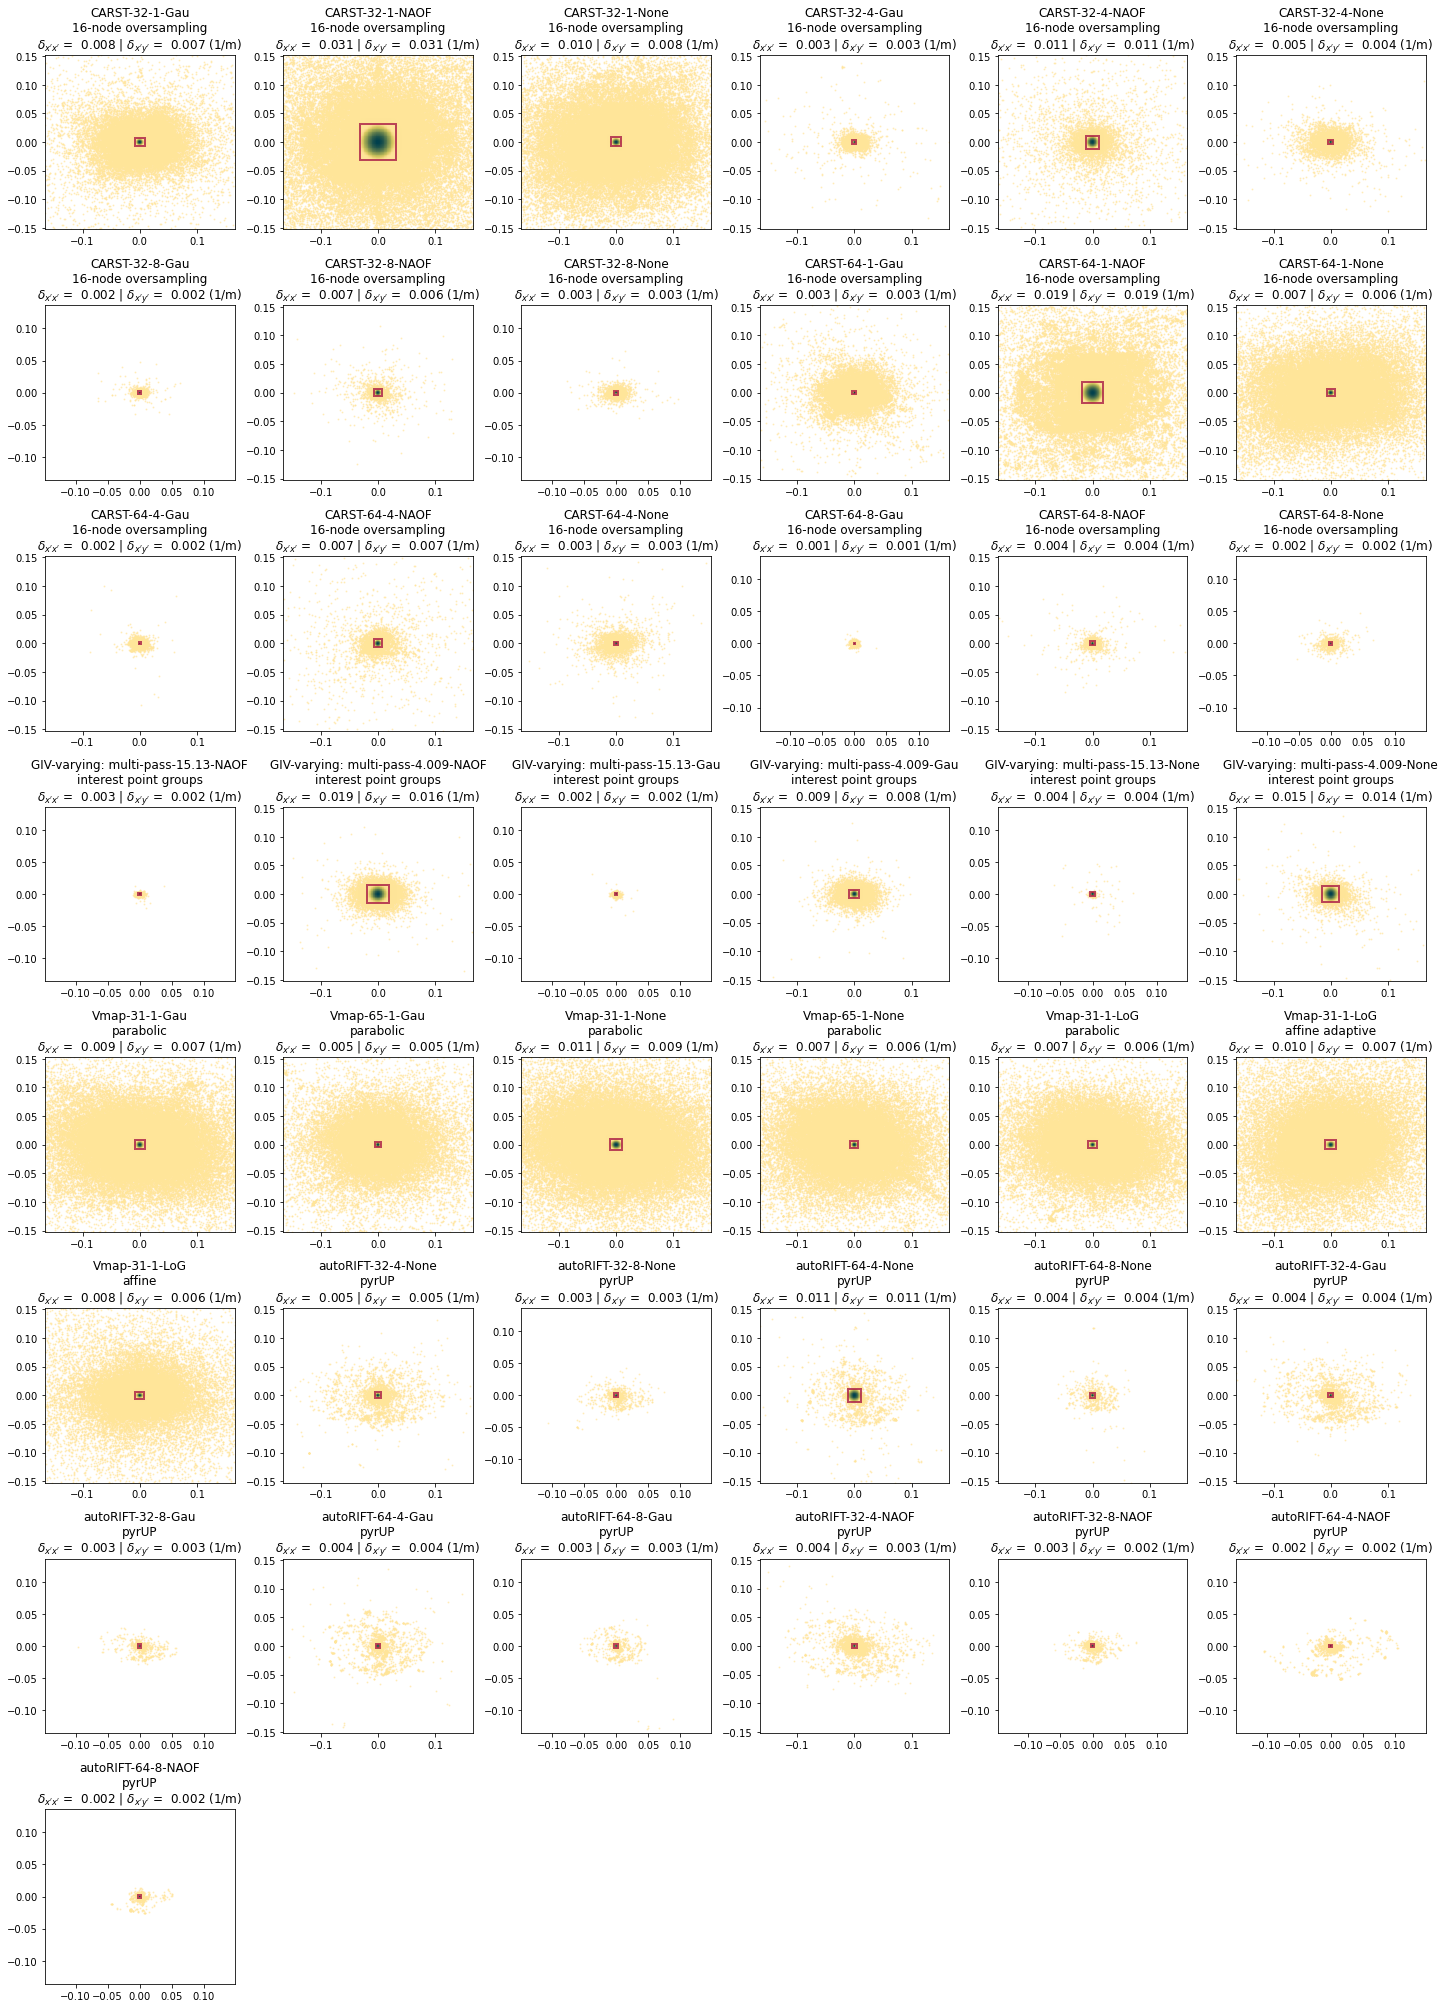

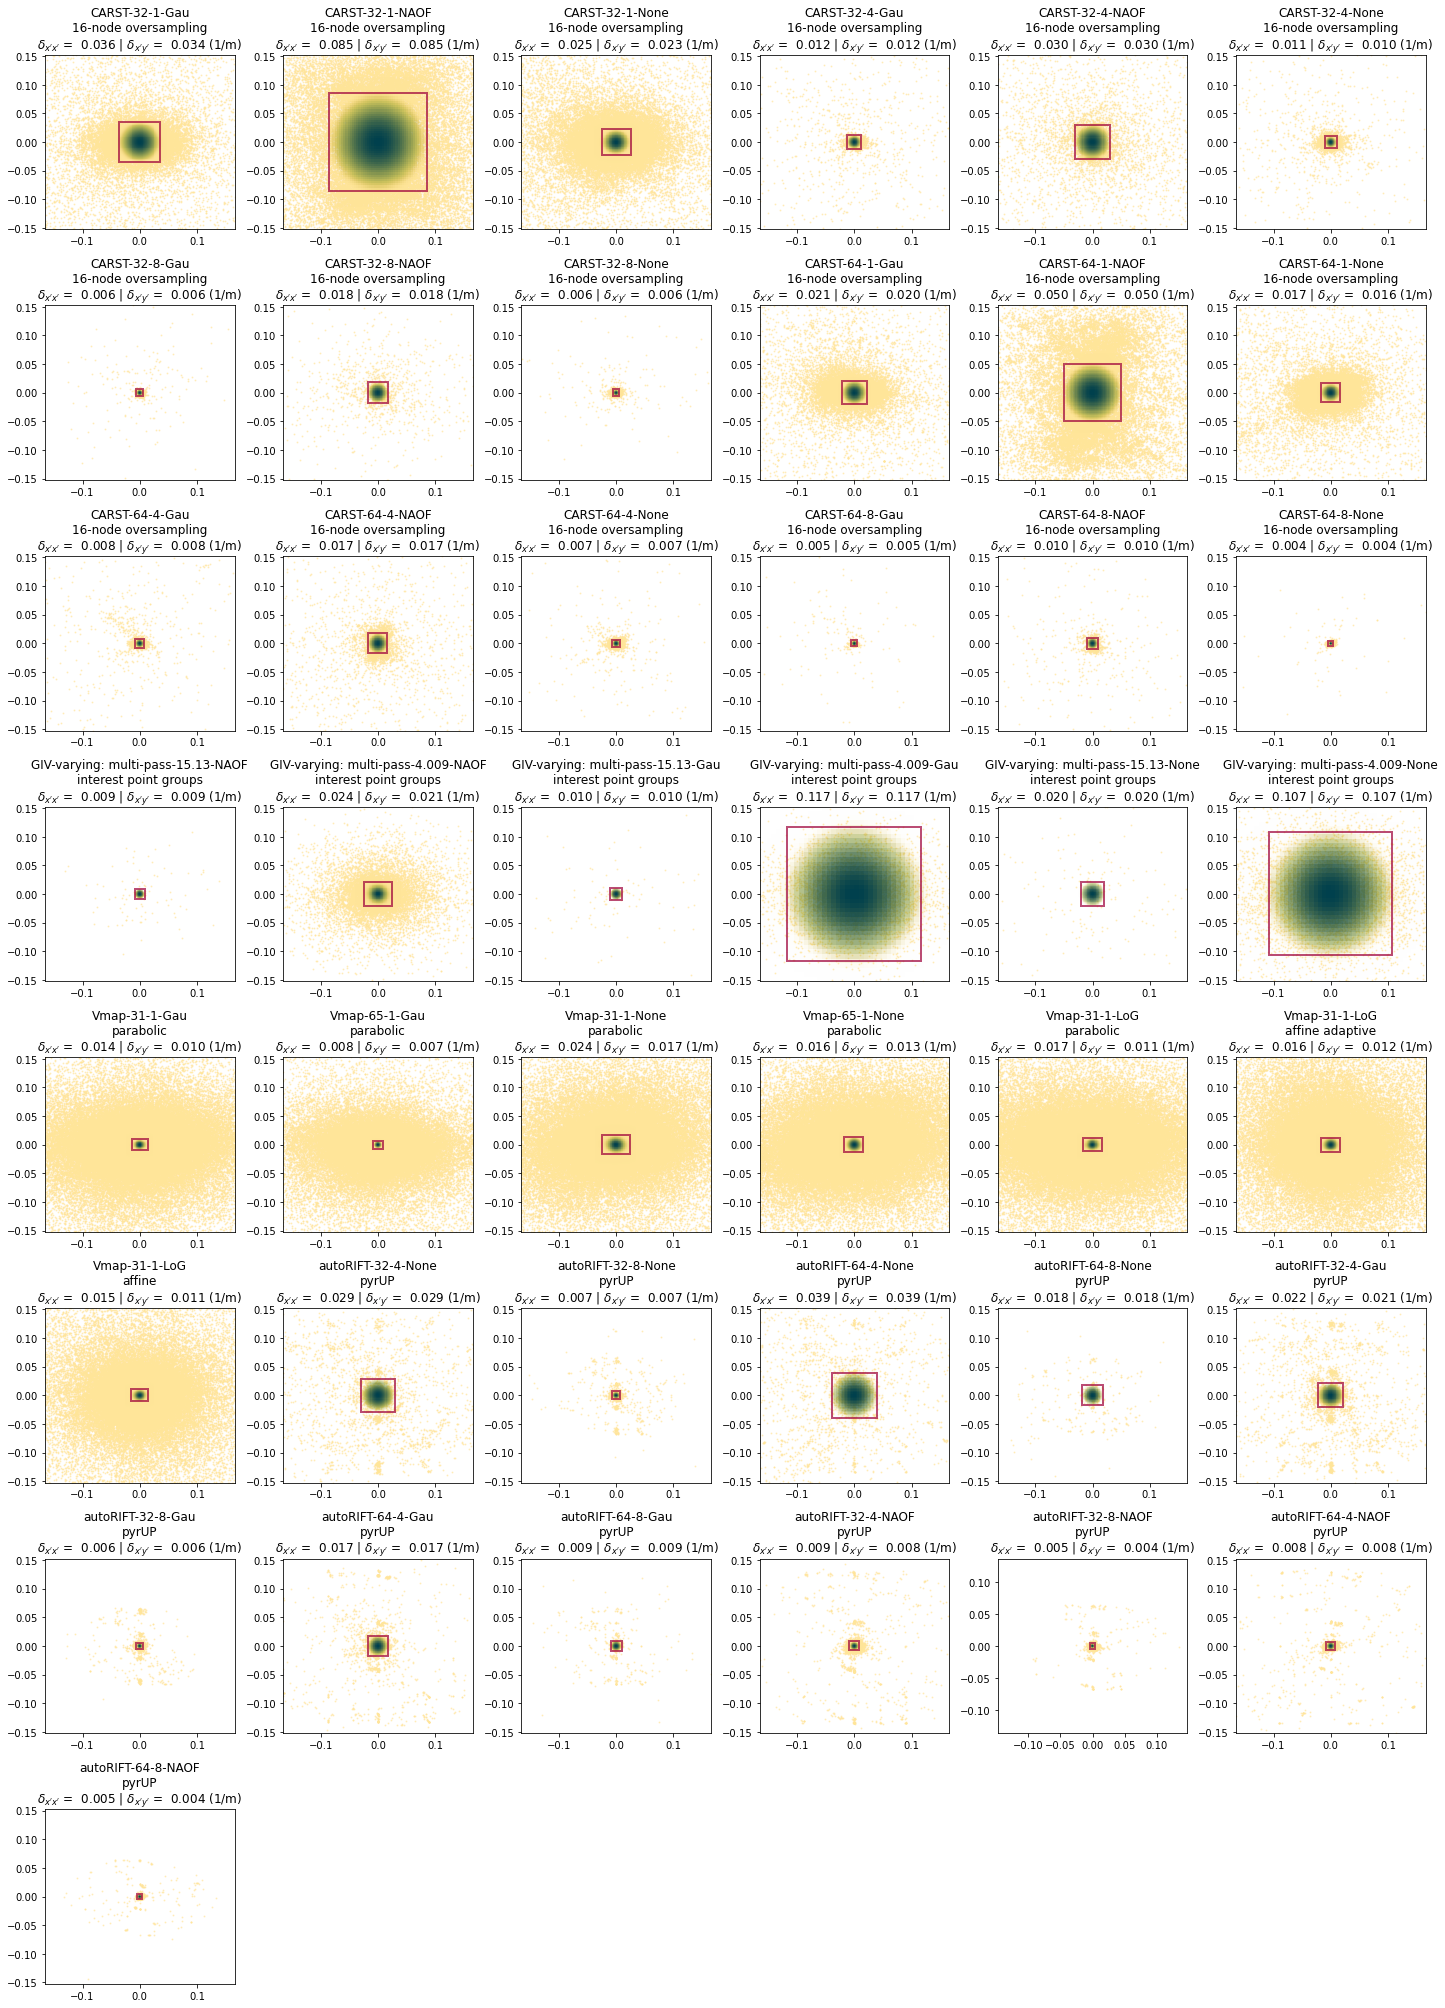

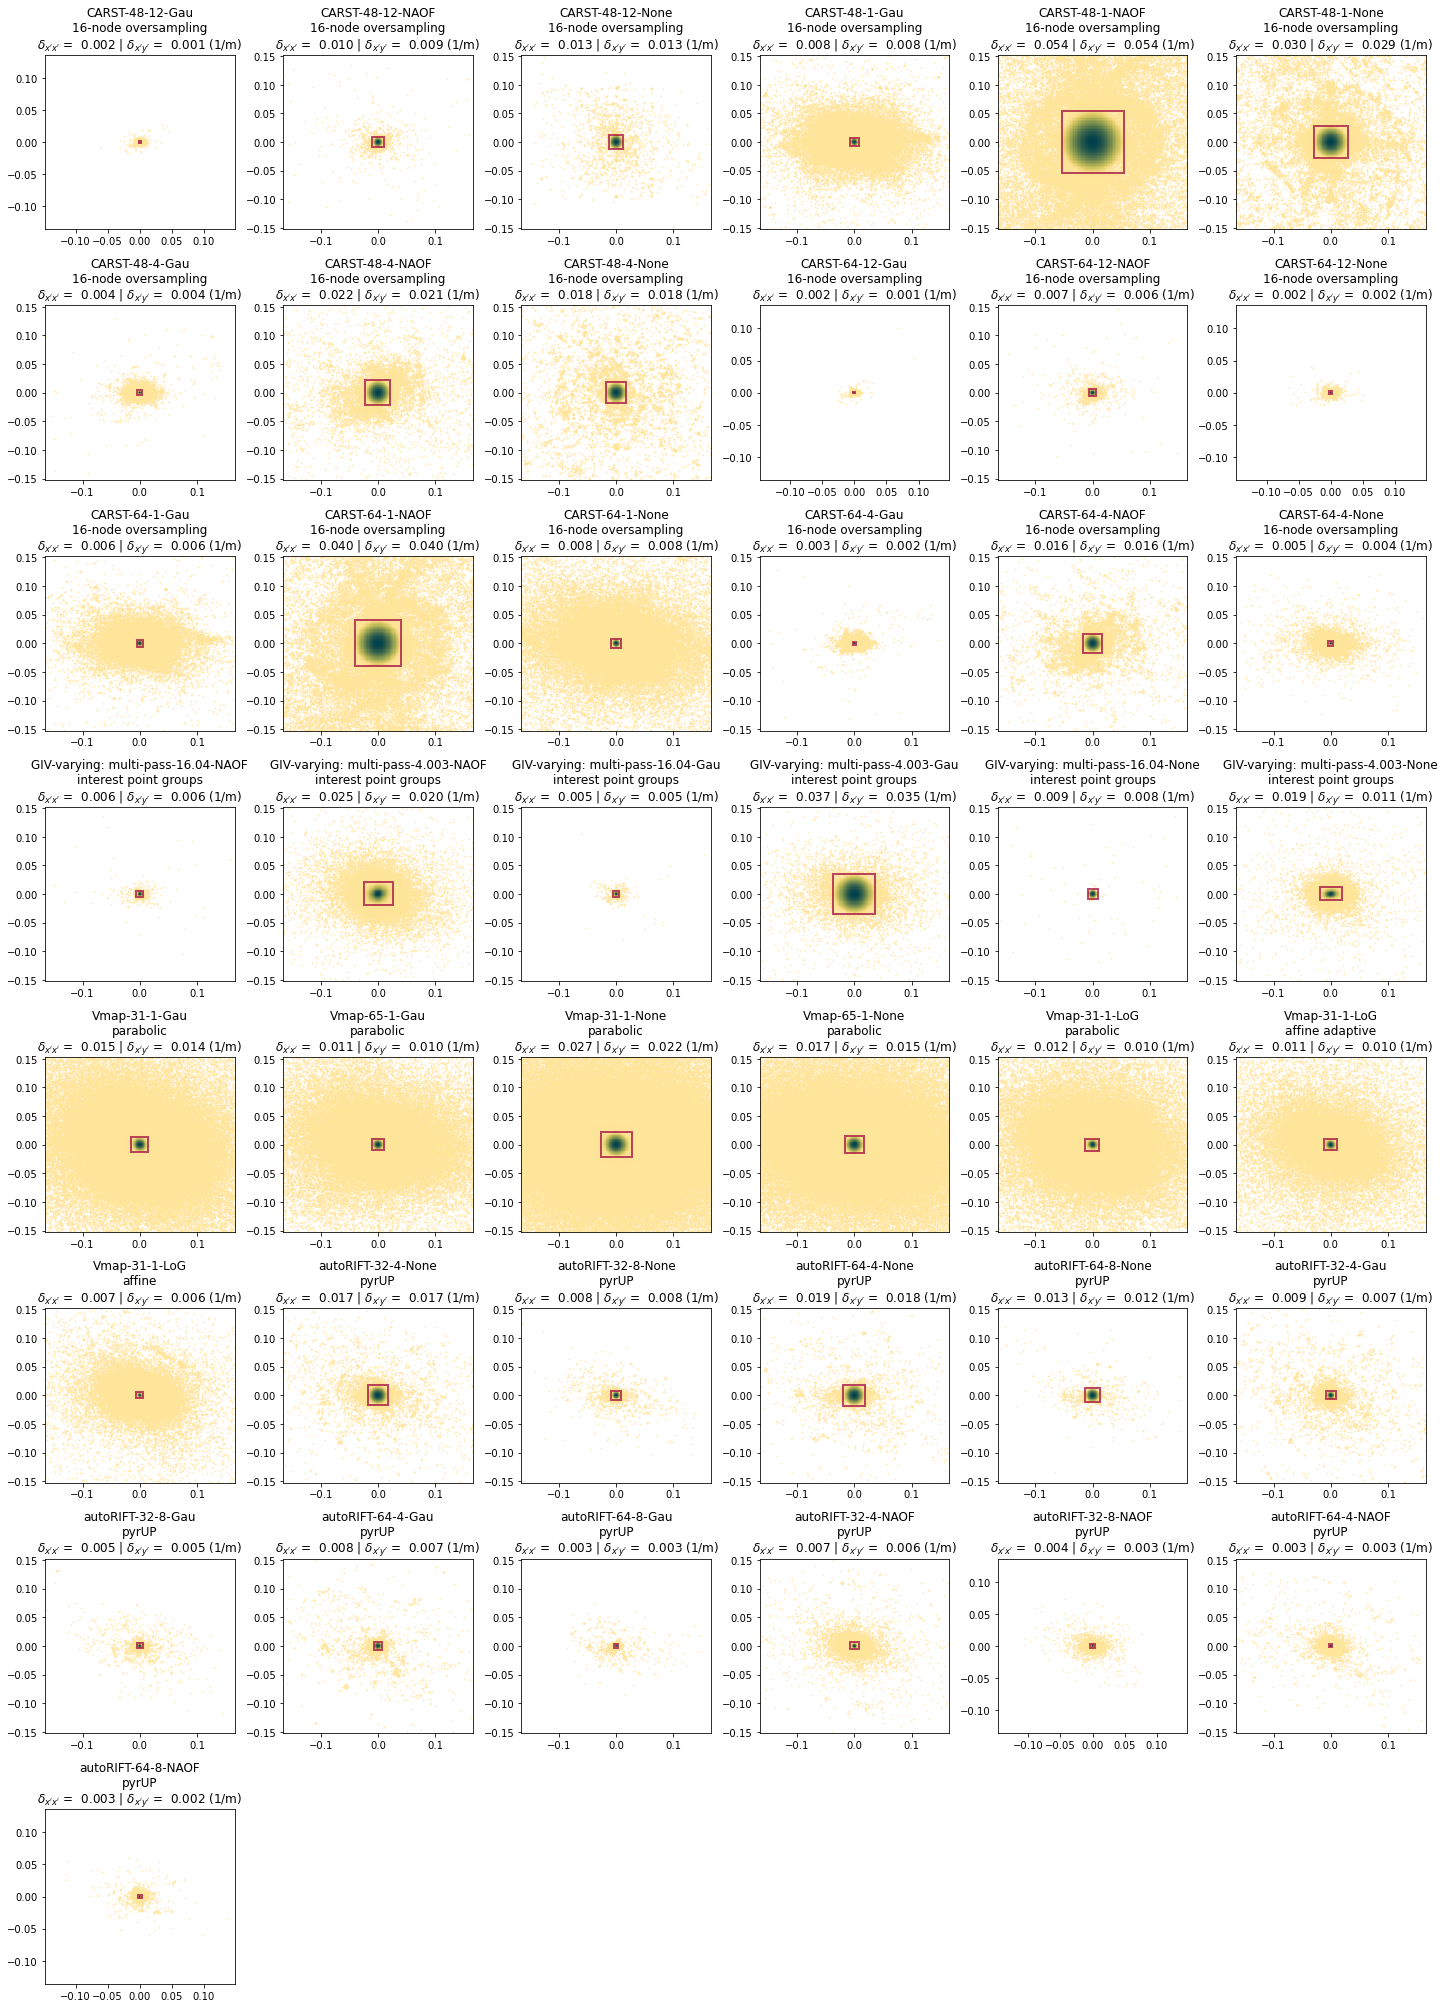

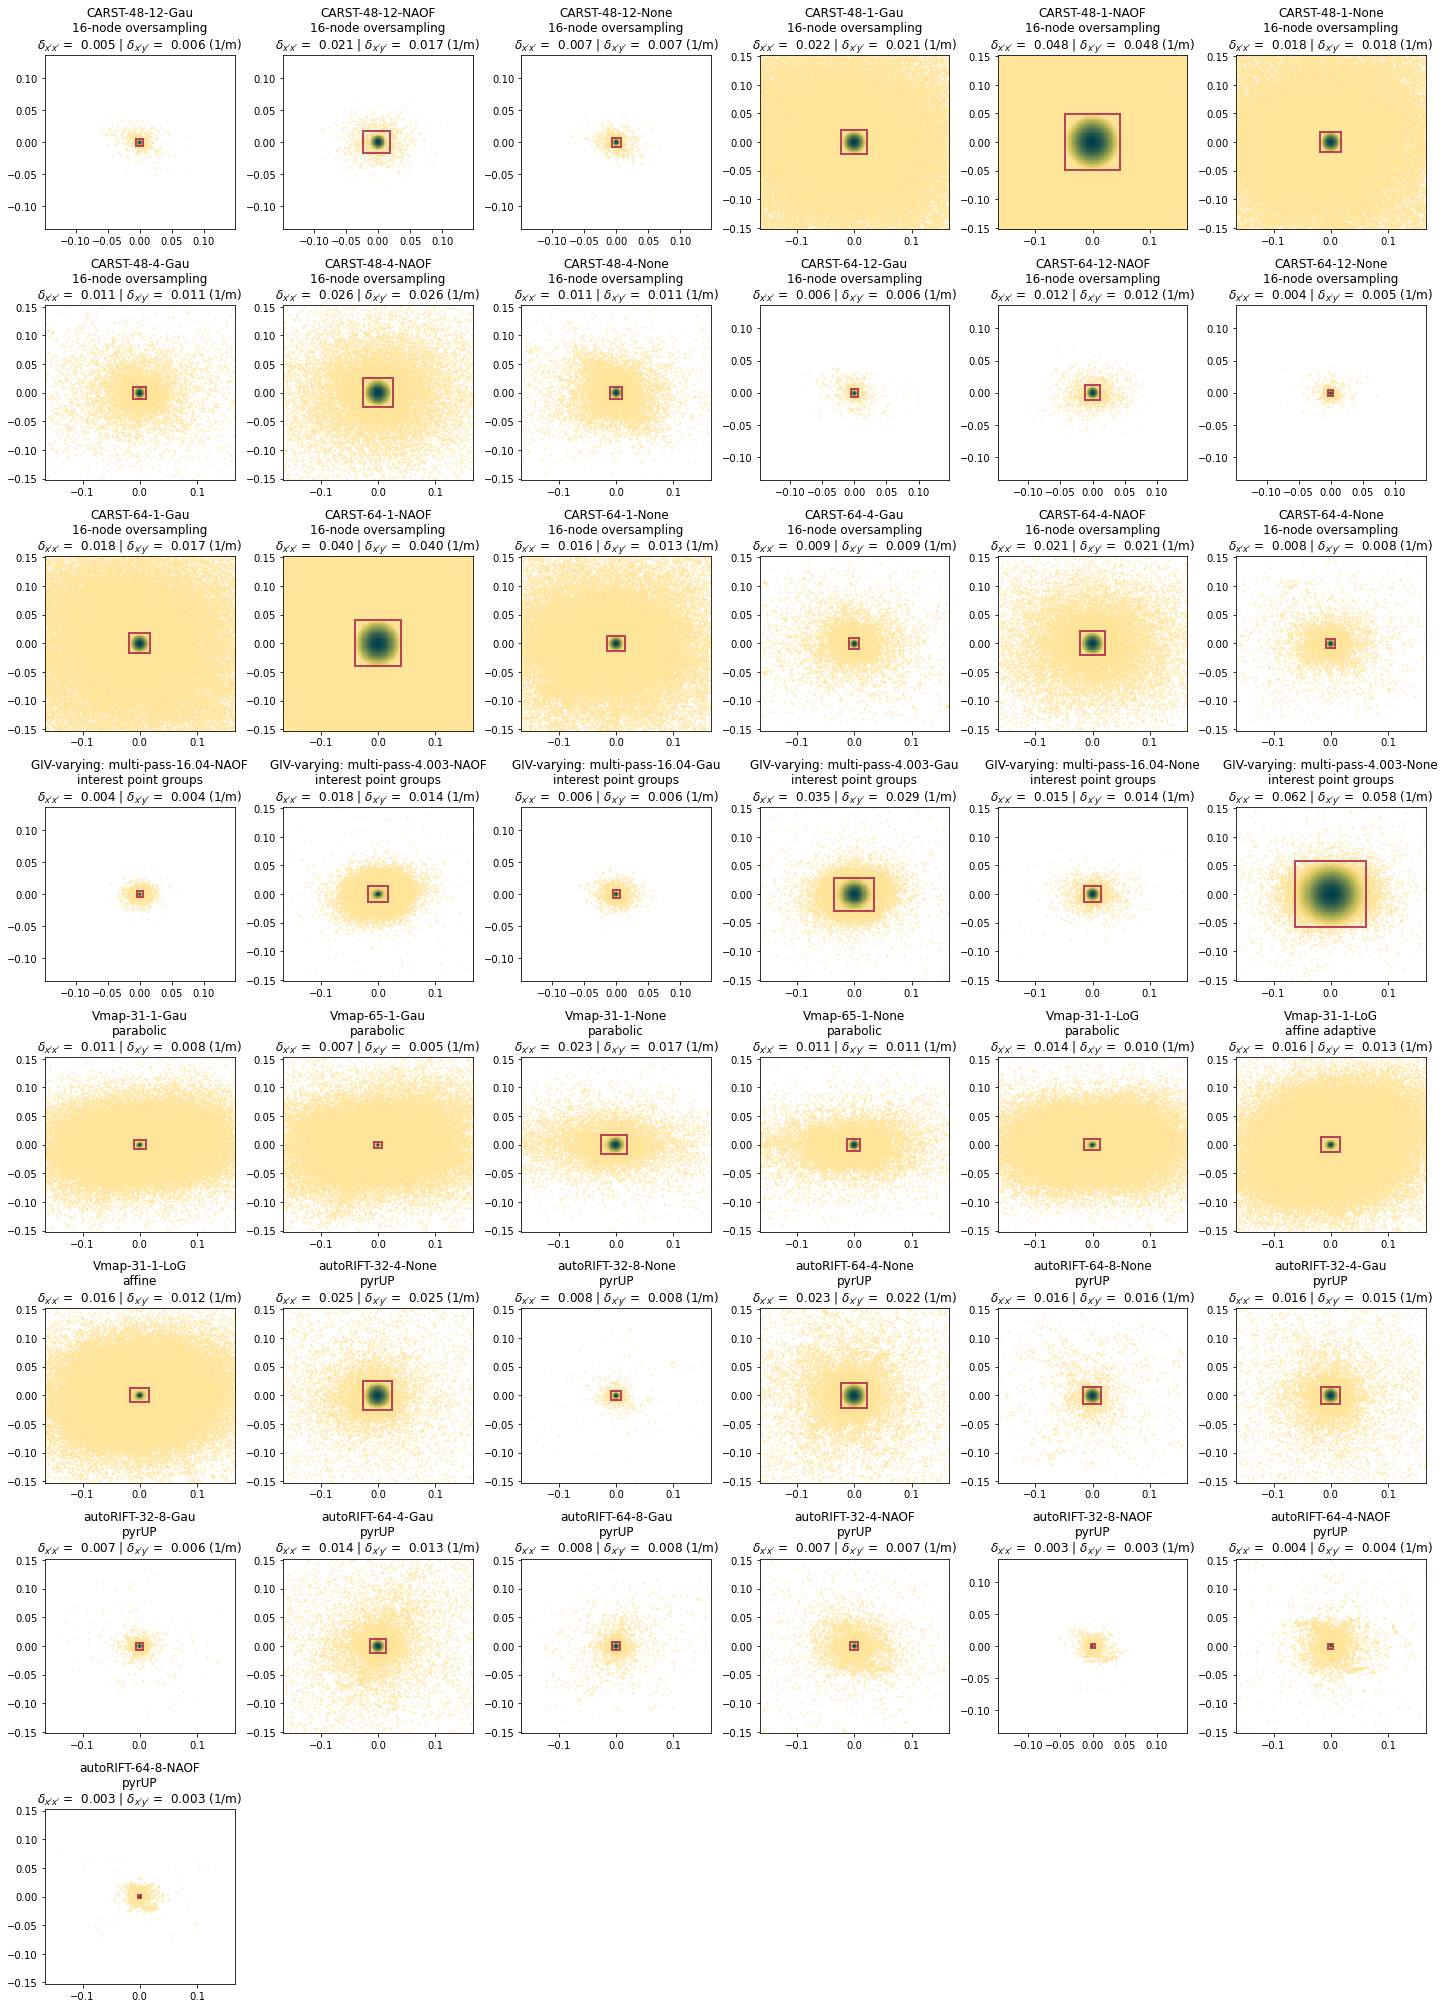

In [7]:
for datestr in ['LS8-20180304-20180405', 'LS8-20180802-20180818', 'Sen2-20180304-20180314', 'Sen2-20180508-20180627']:
    demo = df.loc[df['Date'] == datestr]
    fig, _, df = plot_lsr_batch(demo, df)
    fig.savefig('figs/' + datestr + '-LSR.png')

In [8]:
df.to_csv('../results_2022.csv', index=False)
# df